## **1. Import libraries**

In [ ]:
! pip install lazypredict

  Using cached pandas-1.0.5-cp37-cp37m-manylinux1_x86_64.whl (10.1 MB)
  Using cached numpy-1.19.1-cp37-cp37m-manylinux2010_x86_64.whl (14.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.2
    Uninstalling pandas-1.2.2:
      Successfully uninstalled pandas-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.19.1 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.0.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# align numpy and pandas versions to fix ImportError: cannot import name 'values_from_object' from 'pandas._libs.lib' #337
!pip uninstall numpy -y
!pip install numpy==1.20.1

!pip uninstall pandas -y
!pip install pandas==1.2.2

Found existing installation: numpy 1.19.1
Uninstalling numpy-1.19.1:
  Successfully uninstalled numpy-1.19.1
  Using cached numpy-1.20.1-cp37-cp37m-manylinux2010_x86_64.whl (15.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.20.1 which is incompatible.
lazypredict 0.2.9 requires numpy==1.19.1, but you have numpy 1.20.1 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.0.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Found existing installation: pandas 1.0.5
Uninstalling pandas-1.0.5:
  Successfully uninstalled pandas-1.0.5
  Using cached pandas-1.2.2-cp37-cp37m-manylinux1_x86_64.whl (9.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lazypredict 0.2.9 requires numpy==1.19.1, but you have numpy 1.20.1 which is incompatible.
lazypredict 0.2.9 requires pandas==1.0.5, but you have pandas 1.2.2 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.2.2 which is incompatible.


## **2. Load the data set**


In [ ]:
df = pd.read_csv('FT_join_JH_cleaned.csv')

In [ ]:
X = df[['DISTANCE', 'Heading','Elevation', 'AppliedRat']]
Y = df['VRYIELDBAL']

## **3. Data pre-processing**

In [ ]:
# Examine X dimension
X.shape

(12695, 4)

In [ ]:
Y.shape

(12695,)

In [ ]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(12695, 4)

In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## **4. Compare ML algorithms**

In [ ]:
import pandas as pd
# Defines and builds the lazyclassifier
# 42 algorithms 
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)

train,test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [01:29<00:00,  2.14s/it]


In [ ]:
# Performance table of the training set (80% subset)
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.69,0.69,0.51,0.18
XGBRegressor,0.68,0.68,0.51,0.64
HistGradientBoostingRegressor,0.68,0.68,0.51,0.52
RandomForestRegressor,0.67,0.67,0.52,3.81
BaggingRegressor,0.63,0.63,0.55,0.41
GradientBoostingRegressor,0.59,0.59,0.58,1.21
ExtraTreesRegressor,0.49,0.50,0.64,1.94
DecisionTreeRegressor,0.39,0.39,0.71,0.11
MLPRegressor,0.17,0.17,0.82,11.57


In [ ]:
# Performance table of the test set (20% subset)
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.50,0.51,0.08,3.45
LGBMRegressor,0.50,0.50,0.08,0.18
XGBRegressor,0.49,0.49,0.08,0.66
HistGradientBoostingRegressor,0.49,0.49,0.08,0.64
BaggingRegressor,0.46,0.46,0.09,0.37
GradientBoostingRegressor,0.36,0.36,0.09,1.20
ExtraTreesRegressor,0.36,0.36,0.09,1.70
NuSVR,0.25,0.25,0.10,8.79
SVR,0.24,0.24,0.10,3.66


## **5. Data visualization of model performance**

[(0.0, 1.0)]

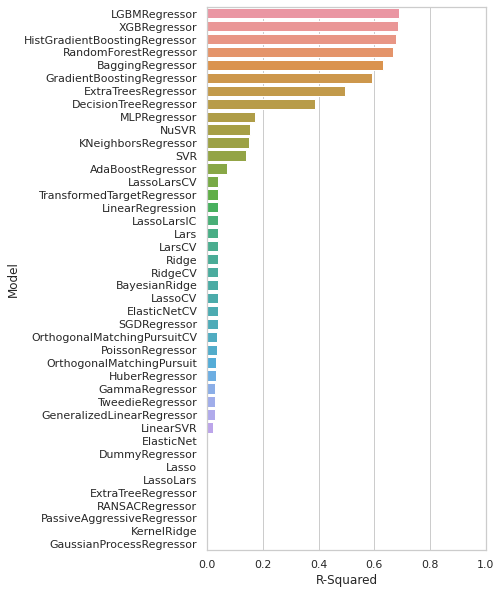

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

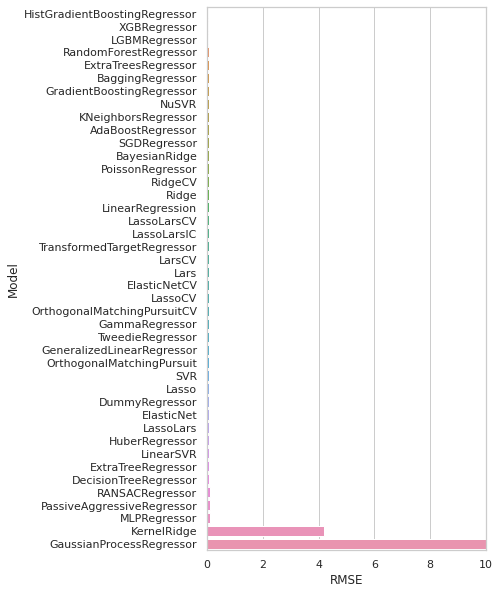

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 10))

[(0.0, 4.0)]

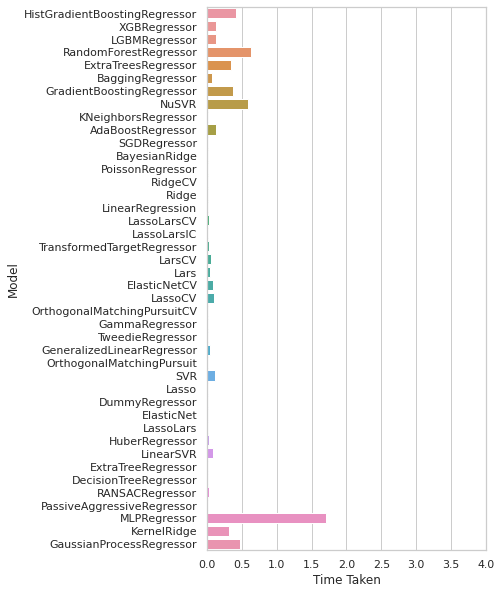

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="Time Taken", data=train)
ax.set(xlim=(0, 4))